In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('HR_Analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,...,2,80,0,10,1,3,10,7,0,9


In [6]:
df.shape

(1470, 35)

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df["left"] = np.where(df["Attrition"] == "Yes",1,0)


In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [16]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [17]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

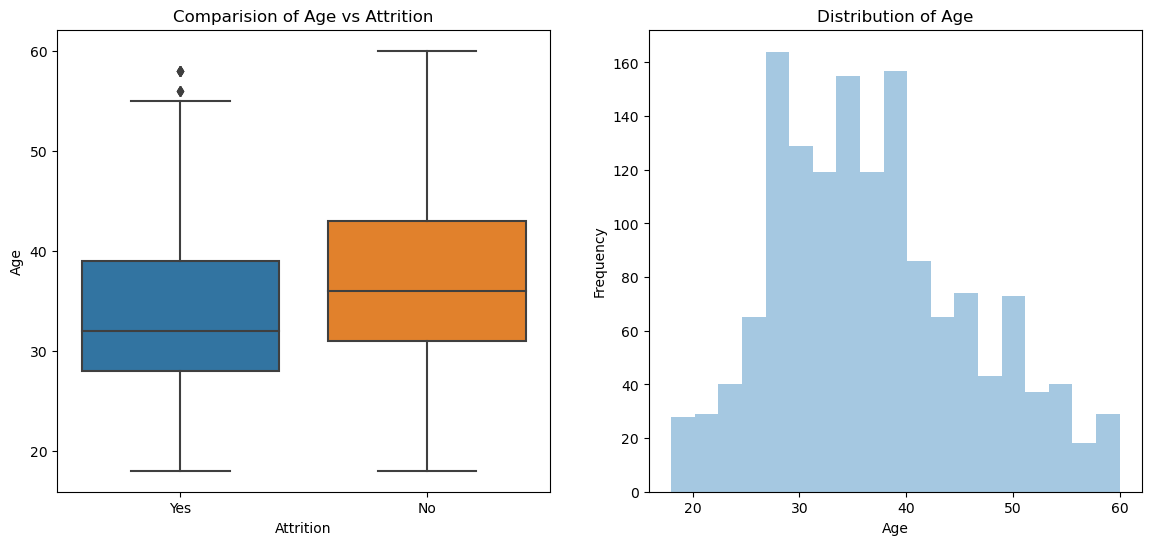

In [18]:

NumericalVariables_targetPlots(df,segment_by="Age")

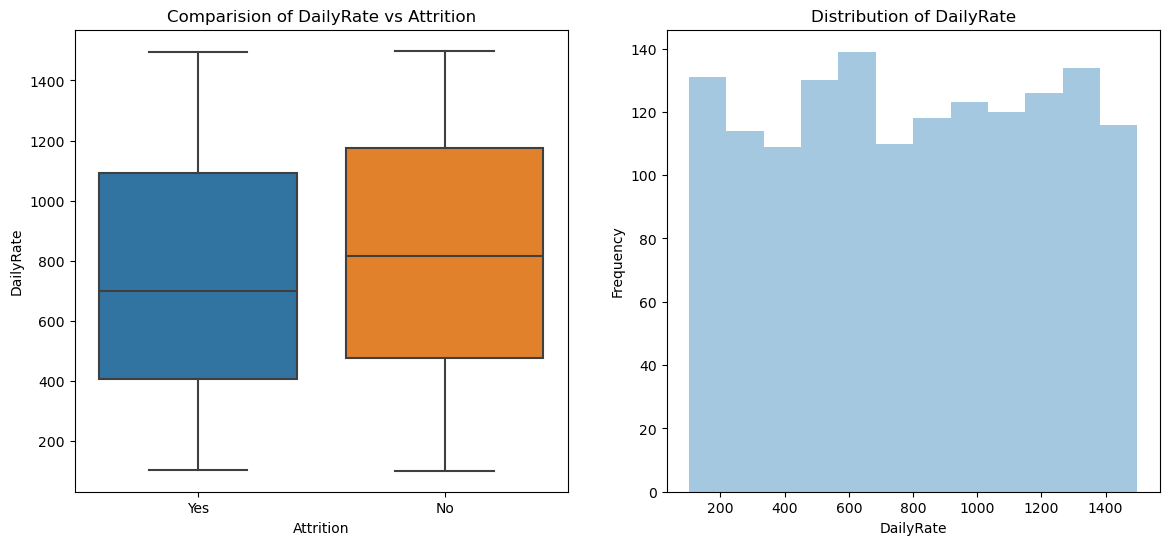

In [19]:
NumericalVariables_targetPlots(df,"DailyRate")

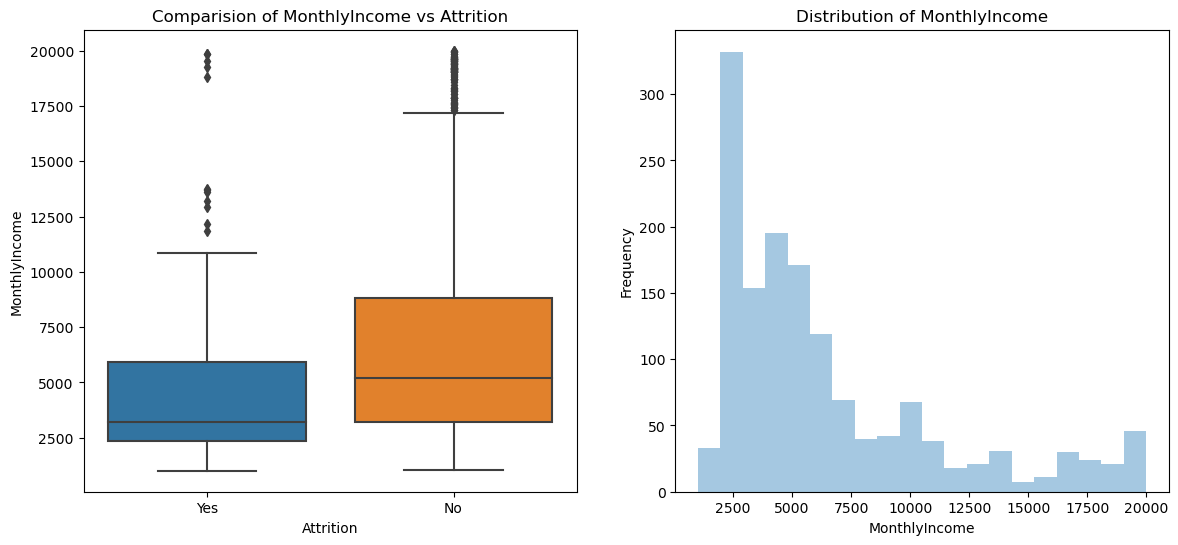

In [20]:
NumericalVariables_targetPlots(df,"MonthlyIncome")

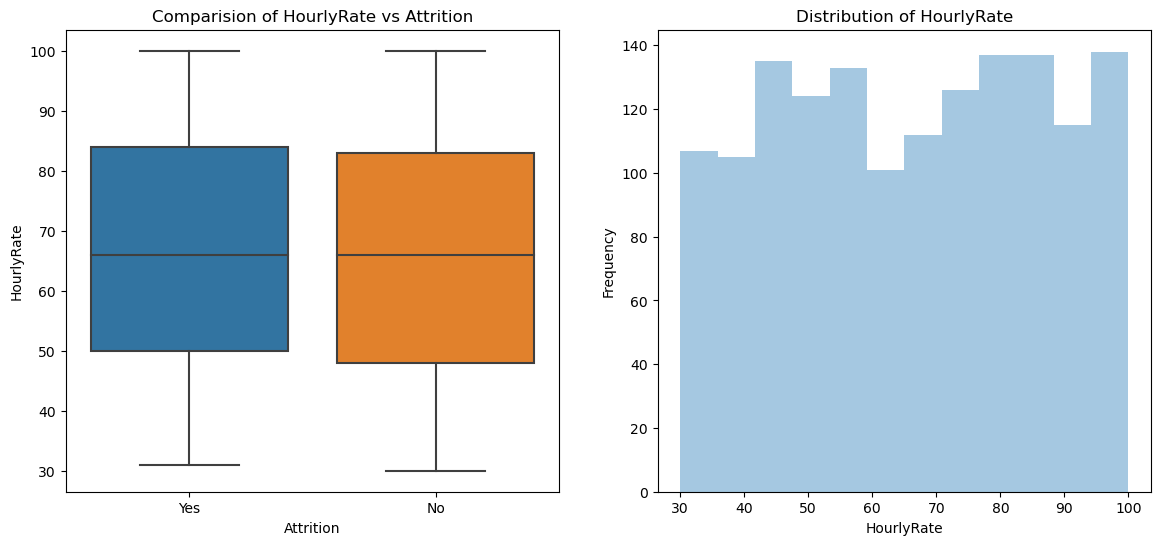

In [21]:
NumericalVariables_targetPlots(df,"HourlyRate")

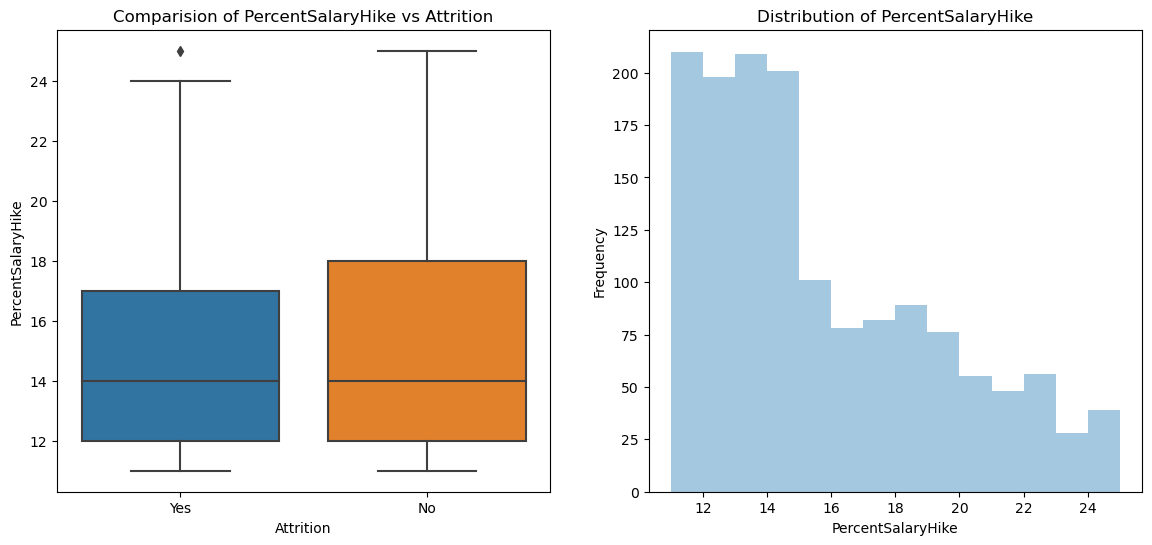

In [22]:
NumericalVariables_targetPlots(df,"PercentSalaryHike")

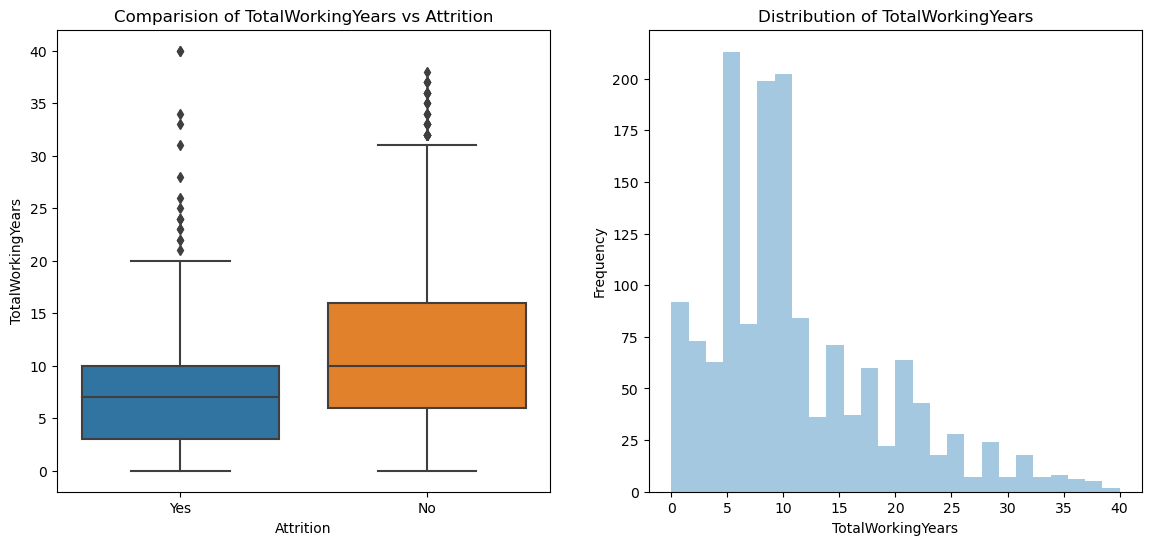

In [23]:
NumericalVariables_targetPlots(df,"TotalWorkingYears")

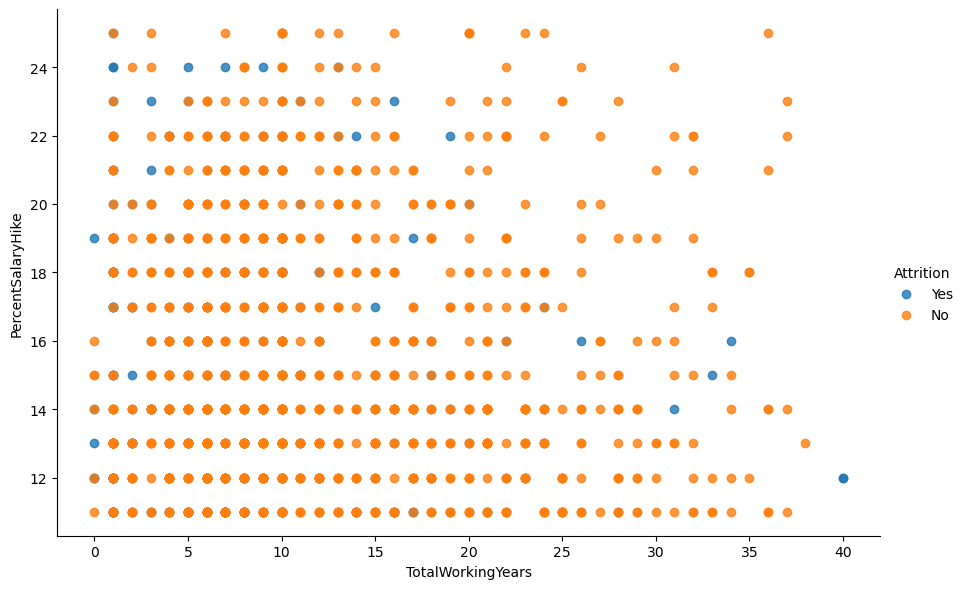

In [25]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=df,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

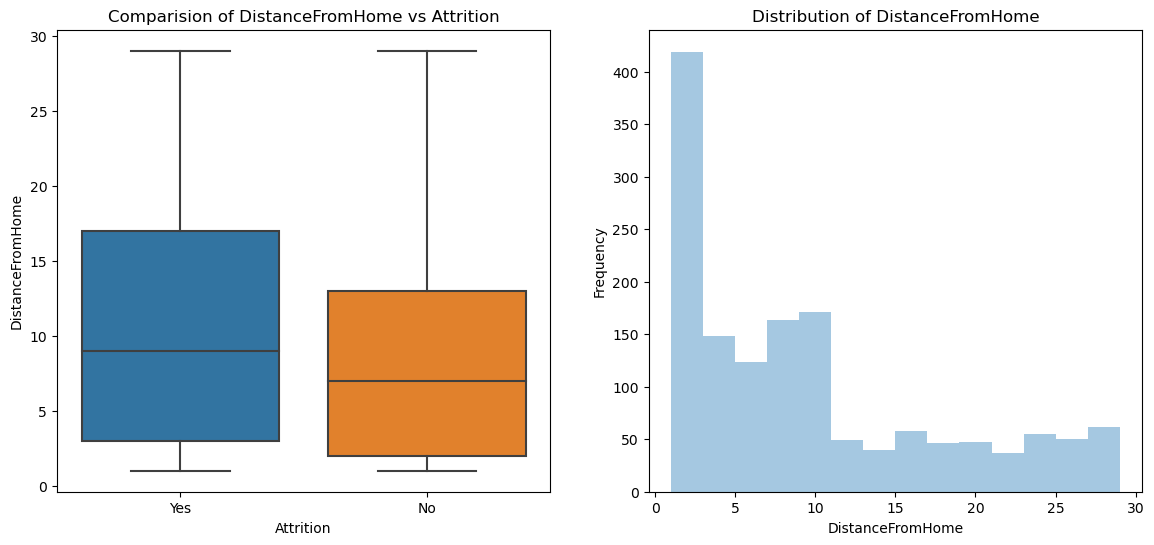

In [26]:
NumericalVariables_targetPlots(df,"DistanceFromHome")

In [27]:
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [28]:
round(df.JobInvolvement.value_counts()/df.shape[0] * 100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

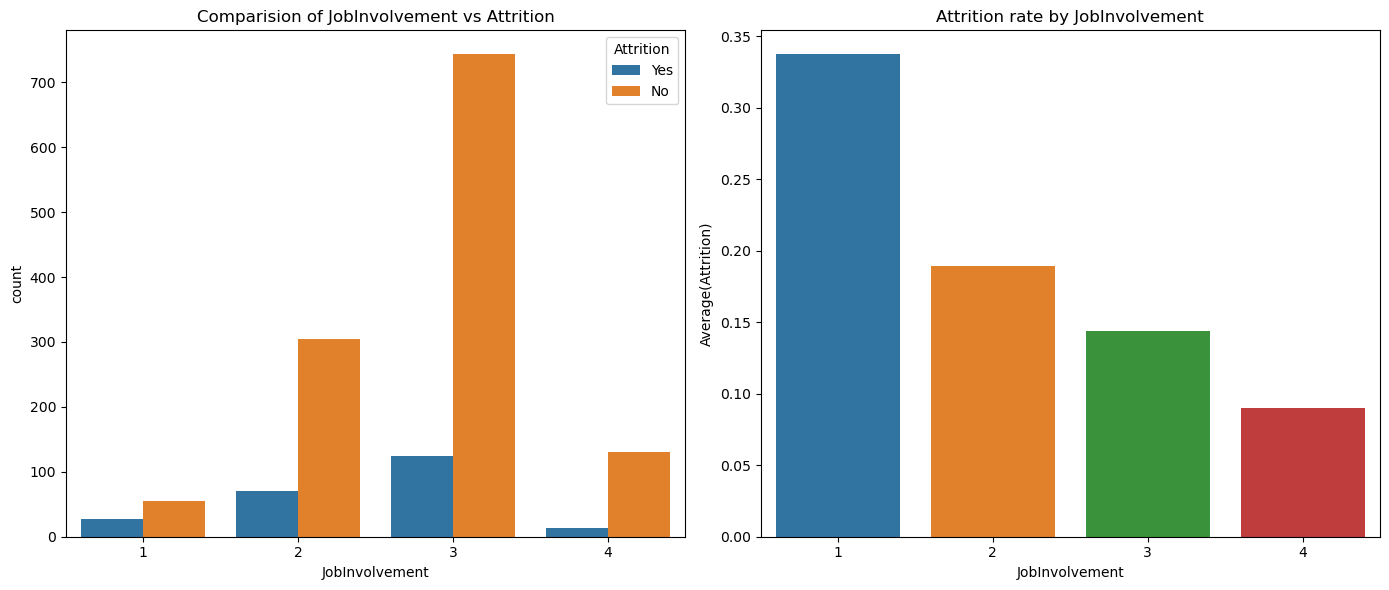

In [29]:
CategoricalVariables_targetPlots(df,"JobInvolvement")

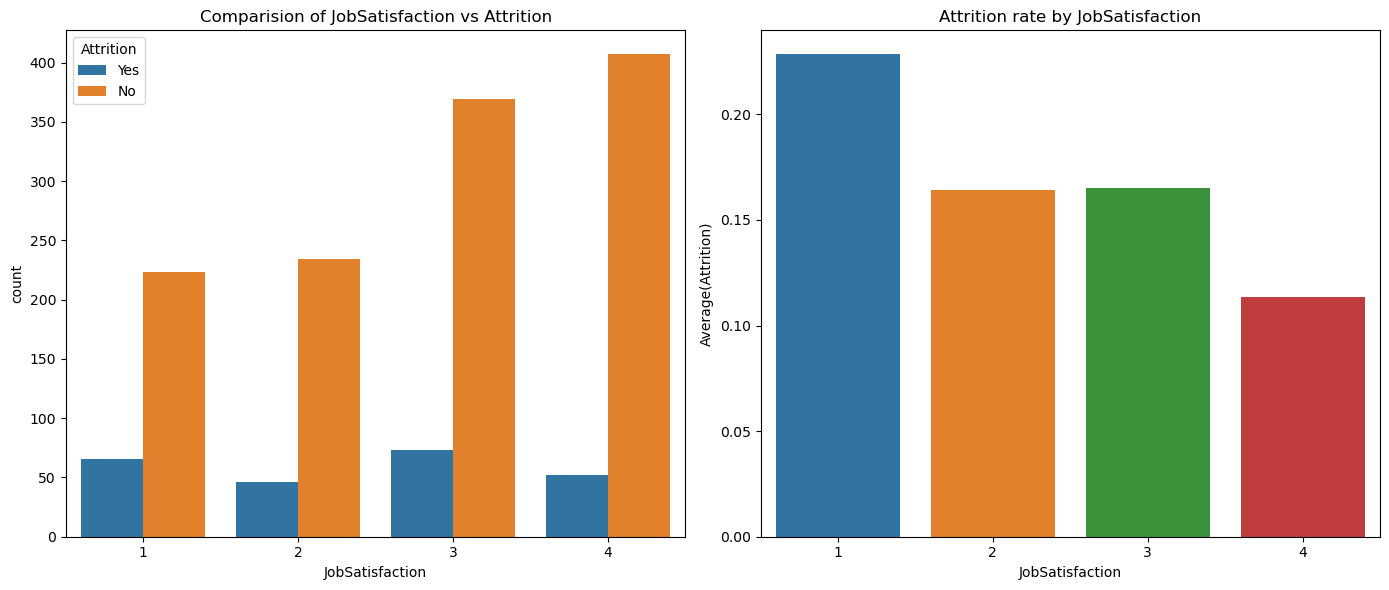

In [30]:
CategoricalVariables_targetPlots(df,"JobSatisfaction")

In [31]:
df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [33]:
round(df.PerformanceRating.value_counts()/df.shape[0] * 100,2)

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

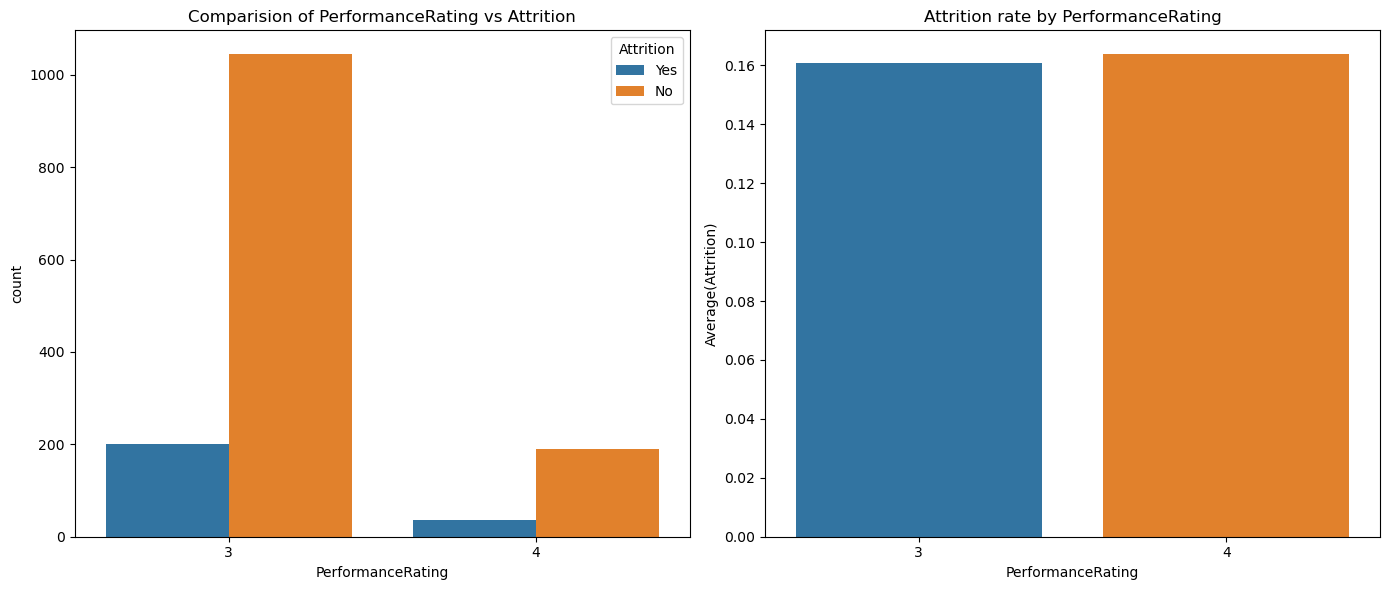

In [34]:
CategoricalVariables_targetPlots(df,"PerformanceRating")

In [35]:
round(df.RelationshipSatisfaction.value_counts()/df.shape[0],2)

3    0.31
4    0.29
2    0.21
1    0.19
Name: RelationshipSatisfaction, dtype: float64

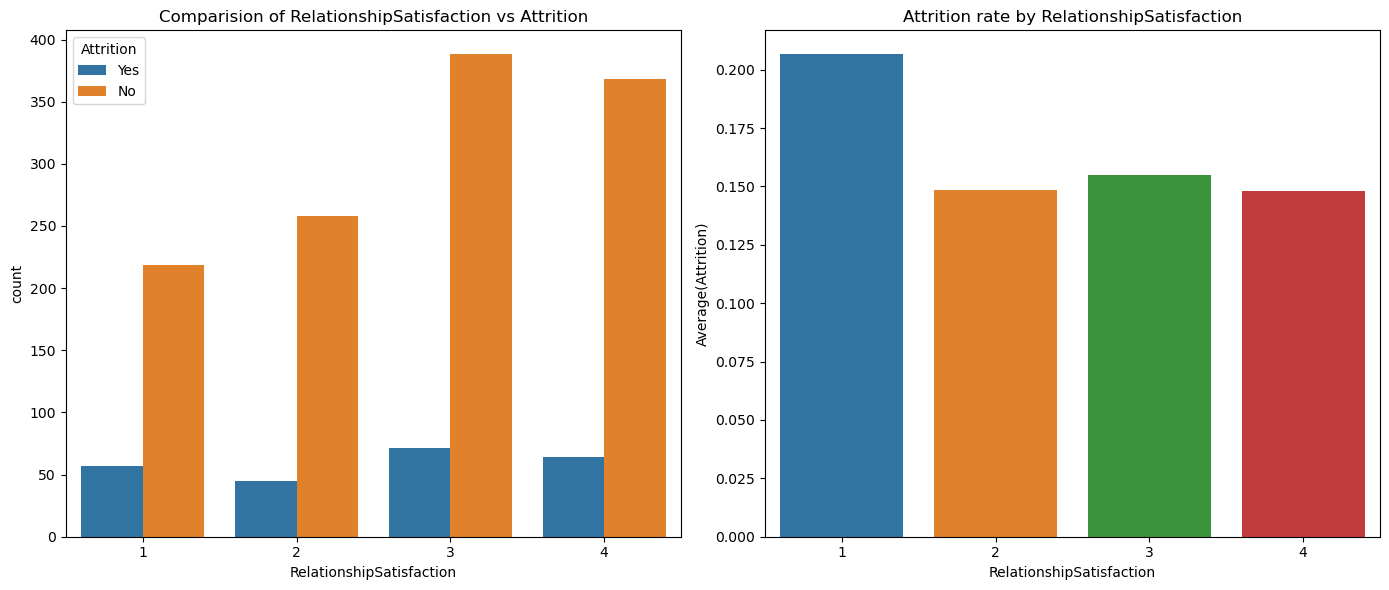

In [36]:
CategoricalVariables_targetPlots(df,"RelationshipSatisfaction")

In [38]:
round(df.WorkLifeBalance.value_counts()/df.shape[0],2)

3    0.61
2    0.23
4    0.10
1    0.05
Name: WorkLifeBalance, dtype: float64

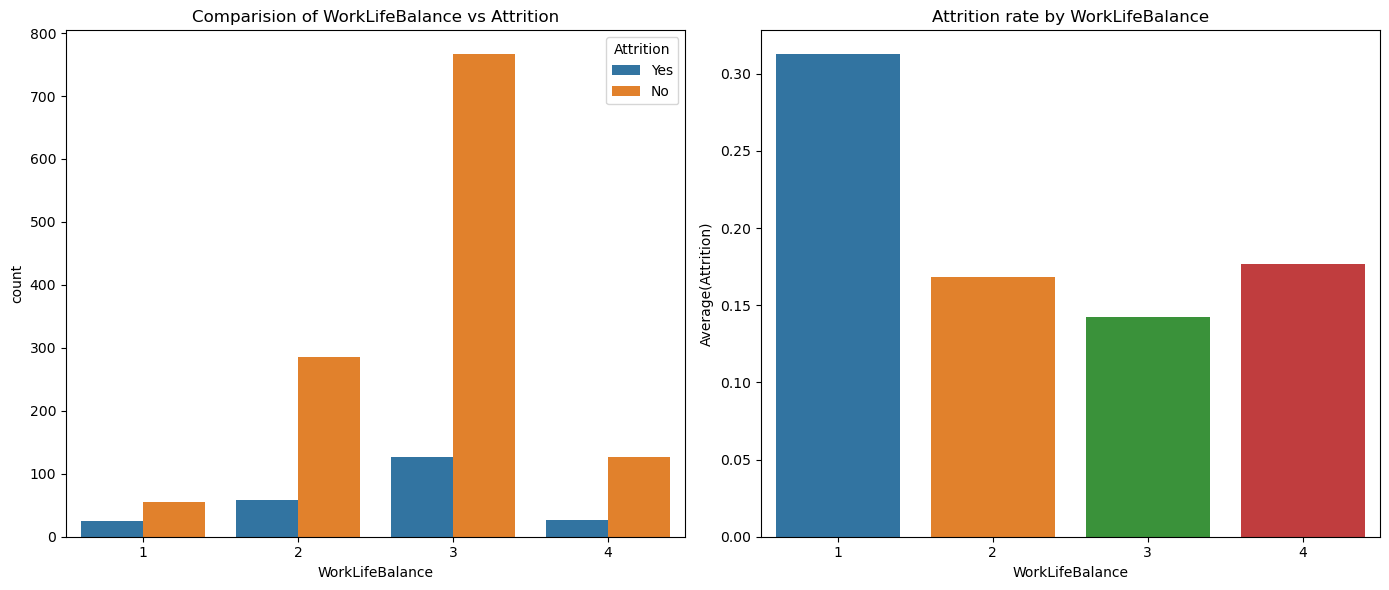

In [39]:
CategoricalVariables_targetPlots(df,"WorkLifeBalance")

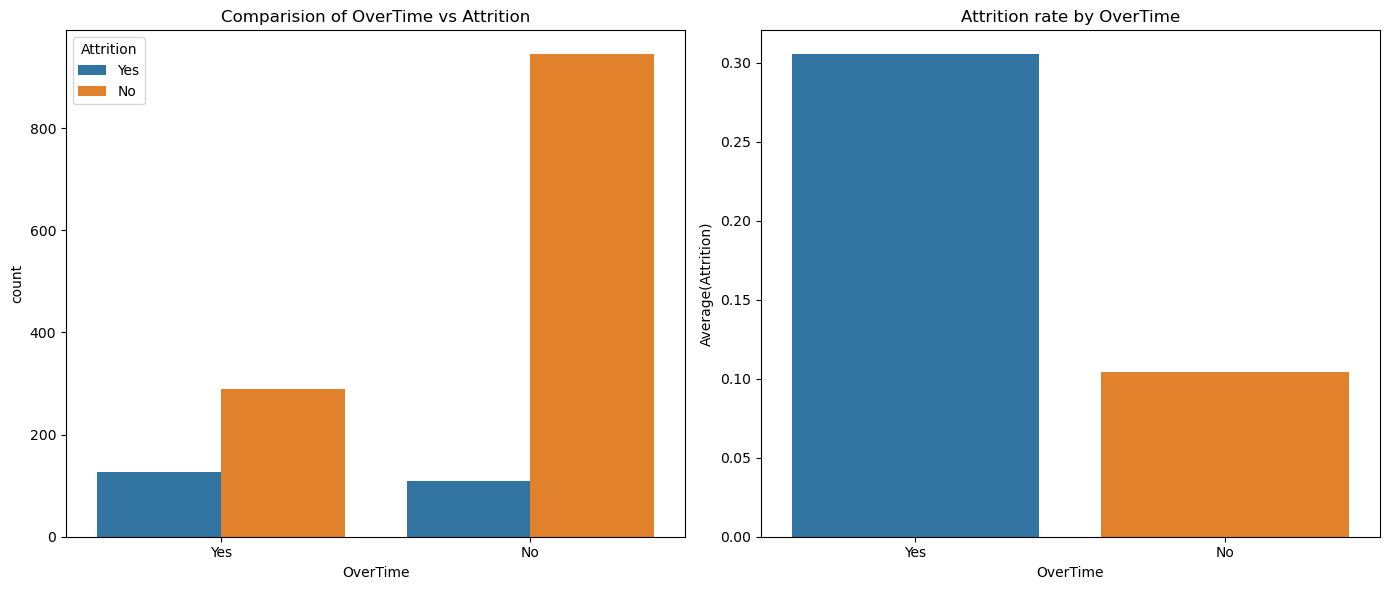

In [40]:
CategoricalVariables_targetPlots(df,"OverTime")


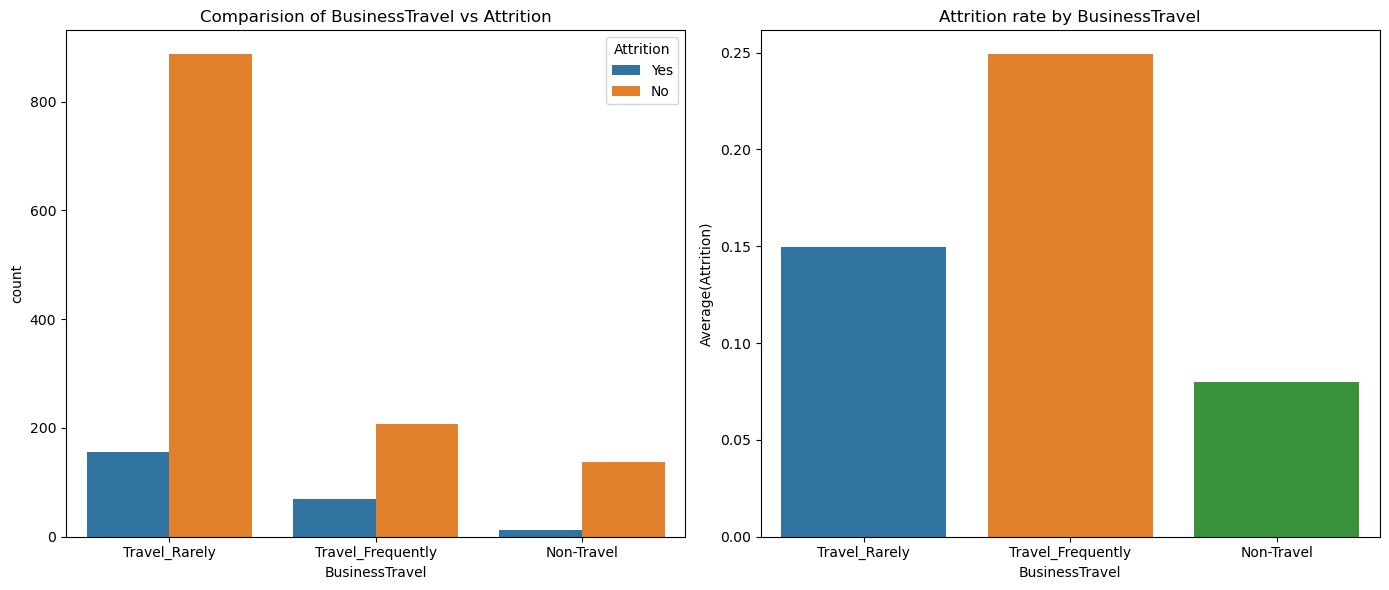

In [41]:
CategoricalVariables_targetPlots(df,segment_by="BusinessTravel")


In [43]:
df.Department.value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

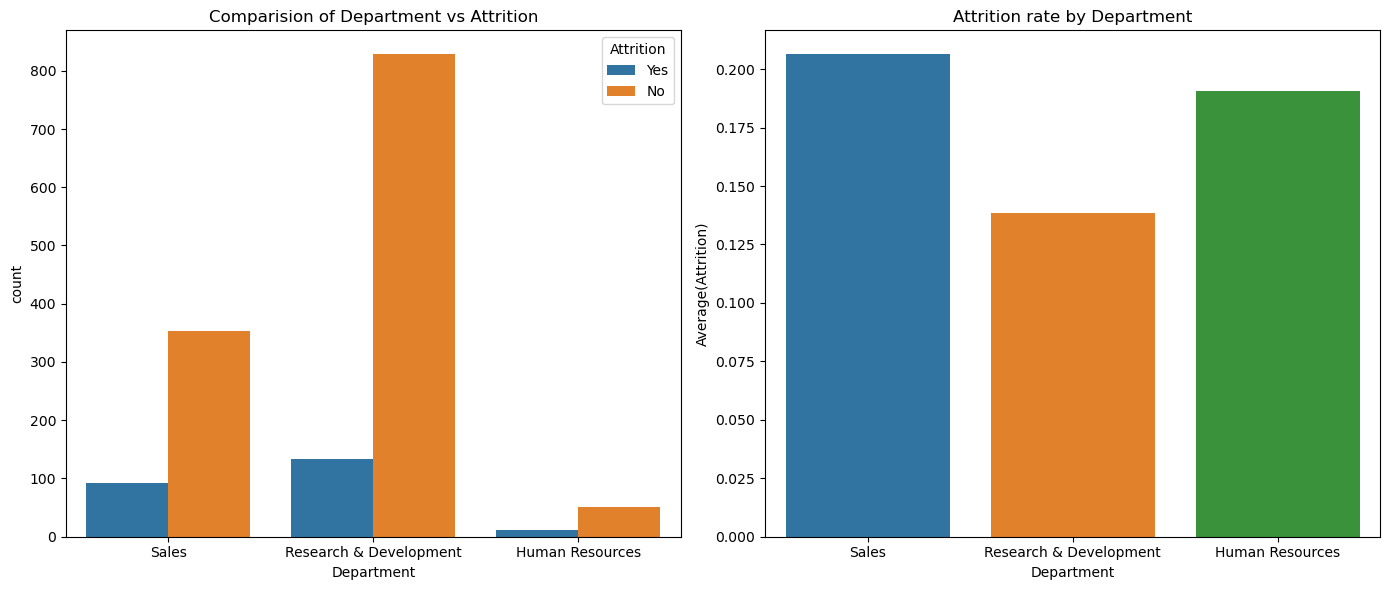

In [44]:
CategoricalVariables_targetPlots(df,segment_by="Department")


In [45]:
df.EducationField.value_counts()


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

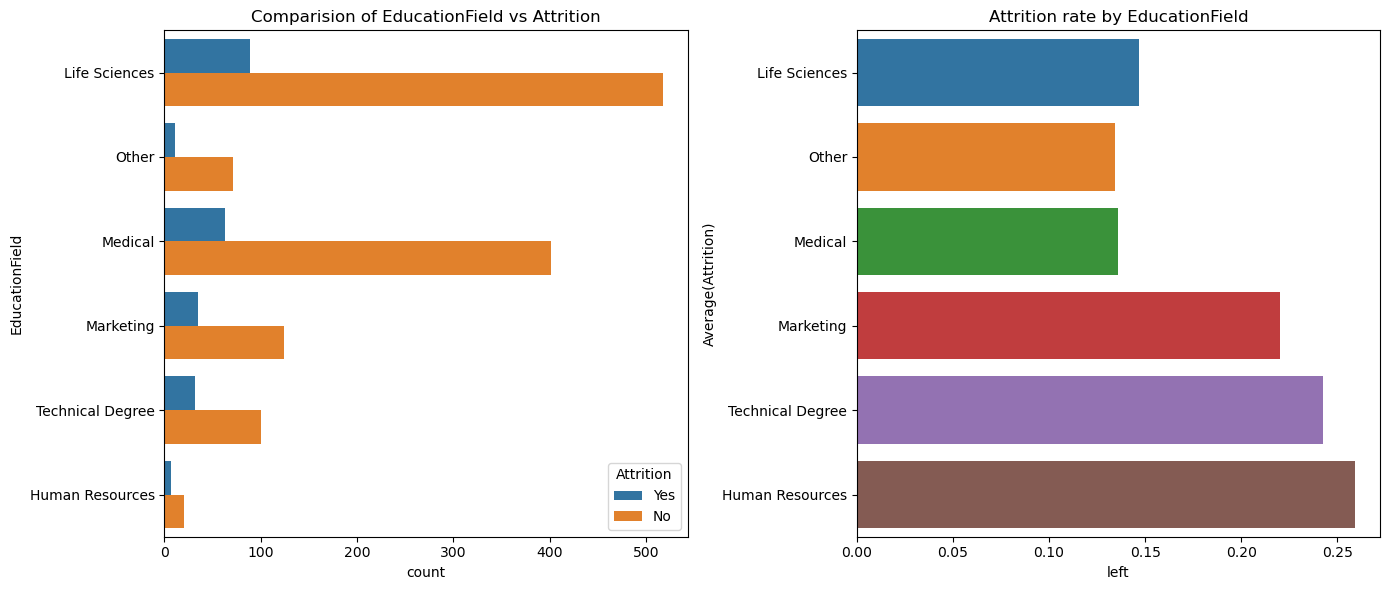

In [46]:
CategoricalVariables_targetPlots(df,"EducationField",invert_axis=True)


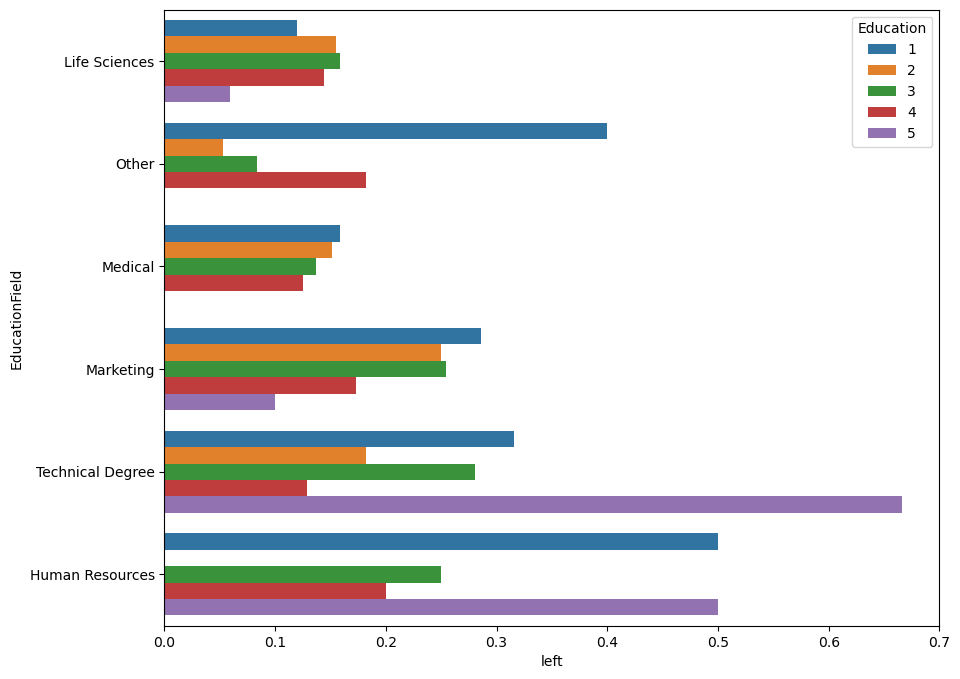

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=df,ci=None)
plt.show()


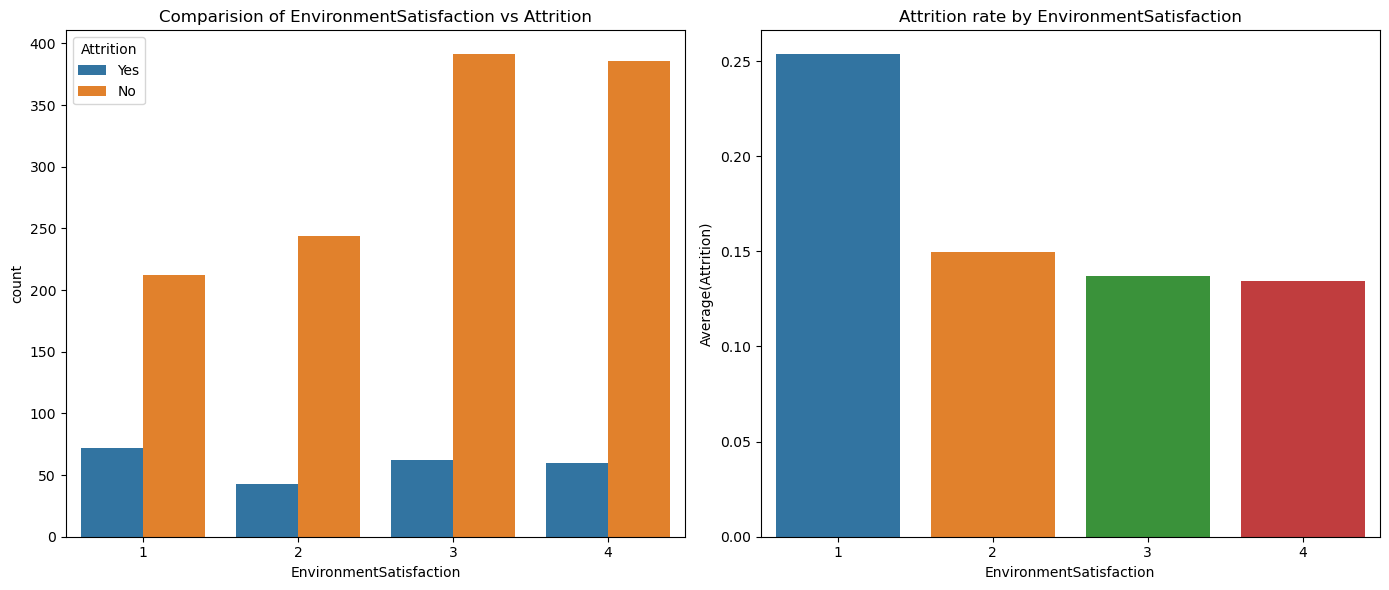

In [48]:
CategoricalVariables_targetPlots(df,"EnvironmentSatisfaction")


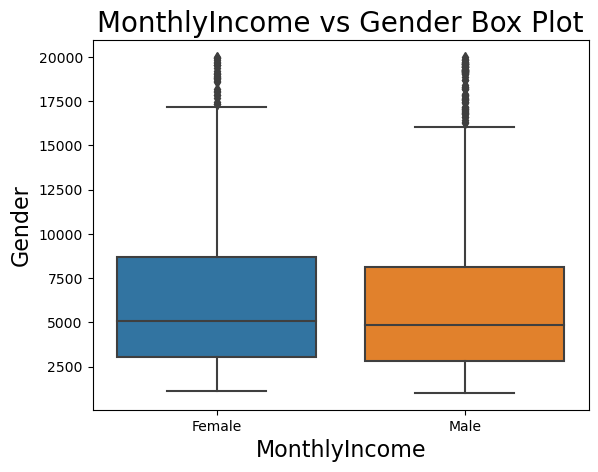

In [49]:
sns.boxplot(df['Gender'], df['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

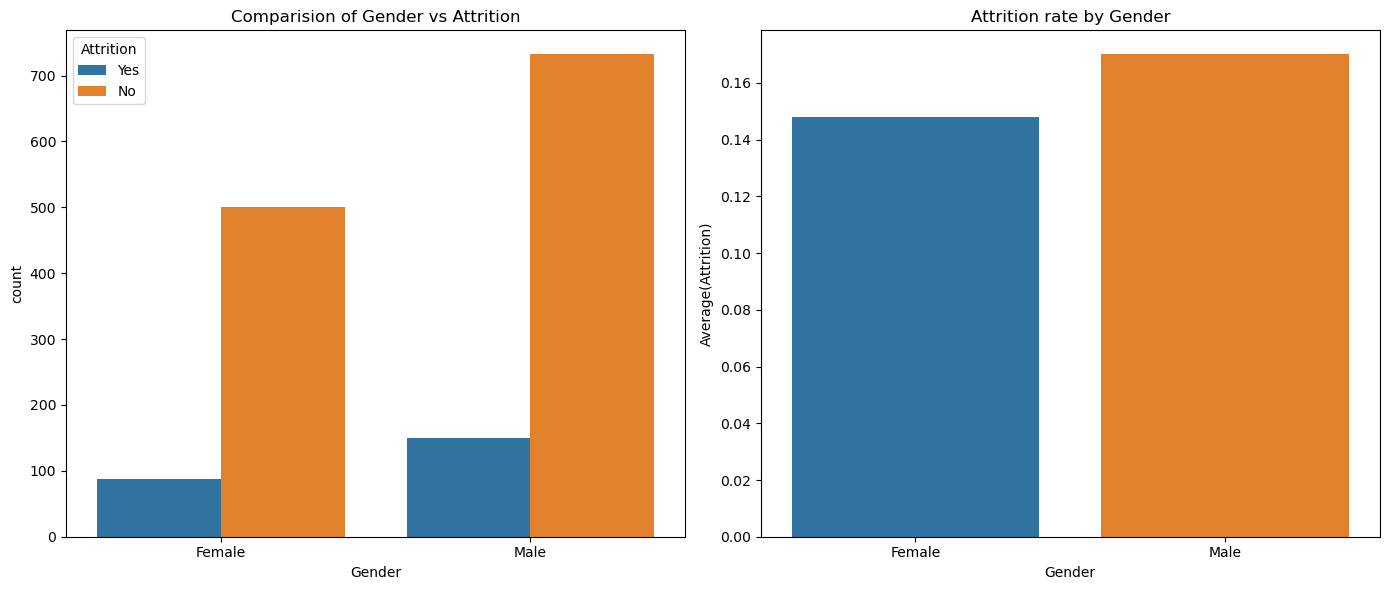

In [50]:
CategoricalVariables_targetPlots(df,"Gender")


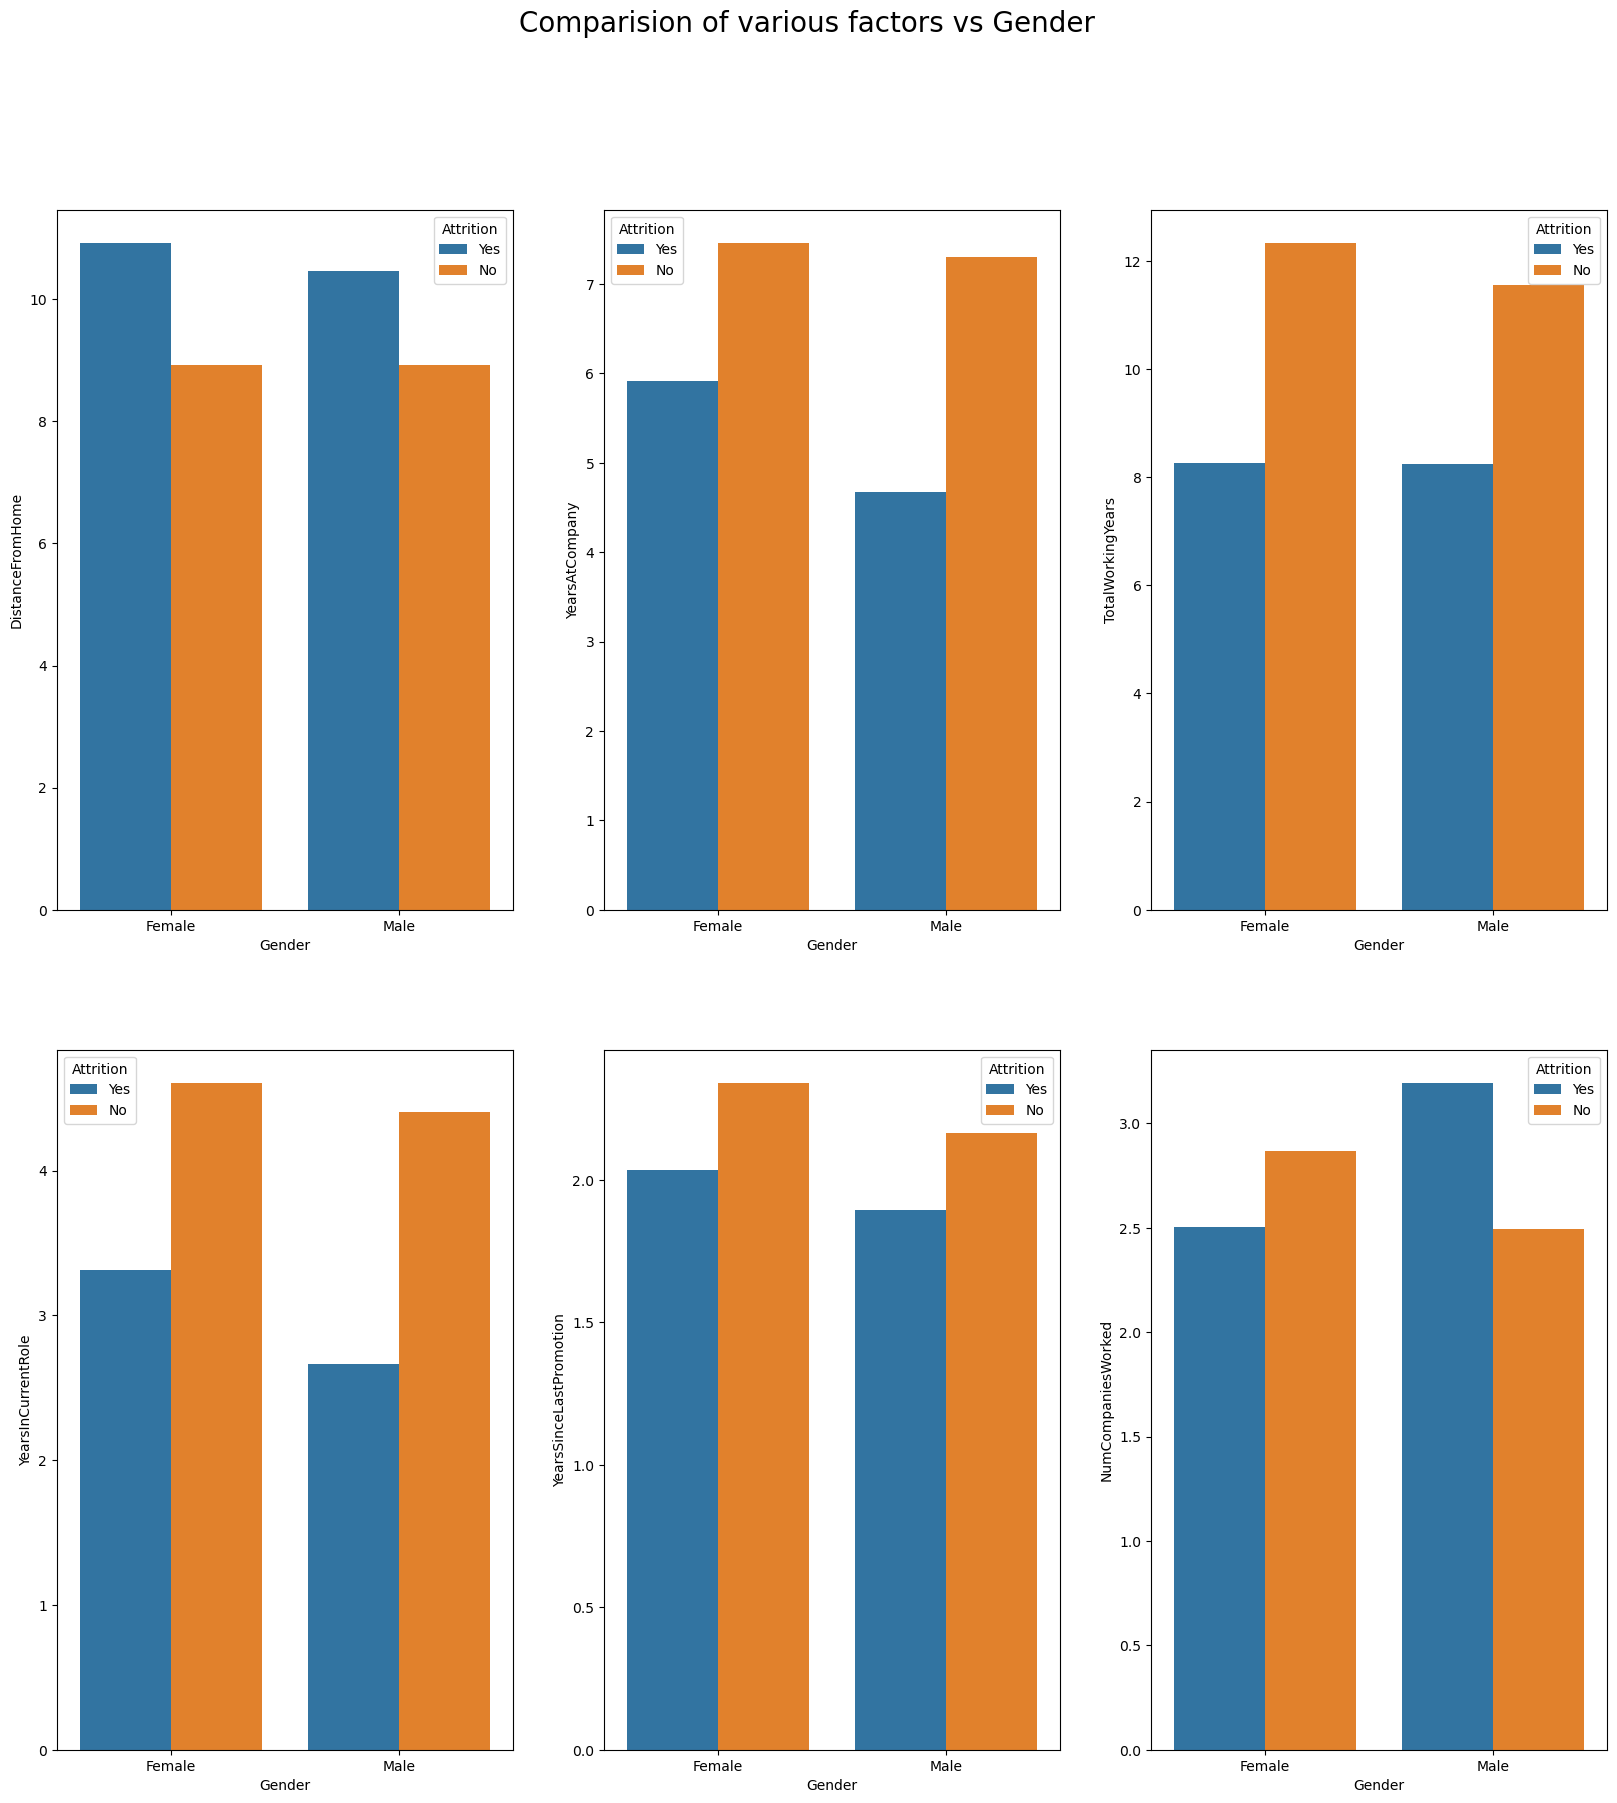

In [51]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['Gender'],df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(df['Gender'],df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(df['Gender'],df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(df['Gender'],df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(df['Gender'],df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(df['Gender'],df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None); 
plt.show()


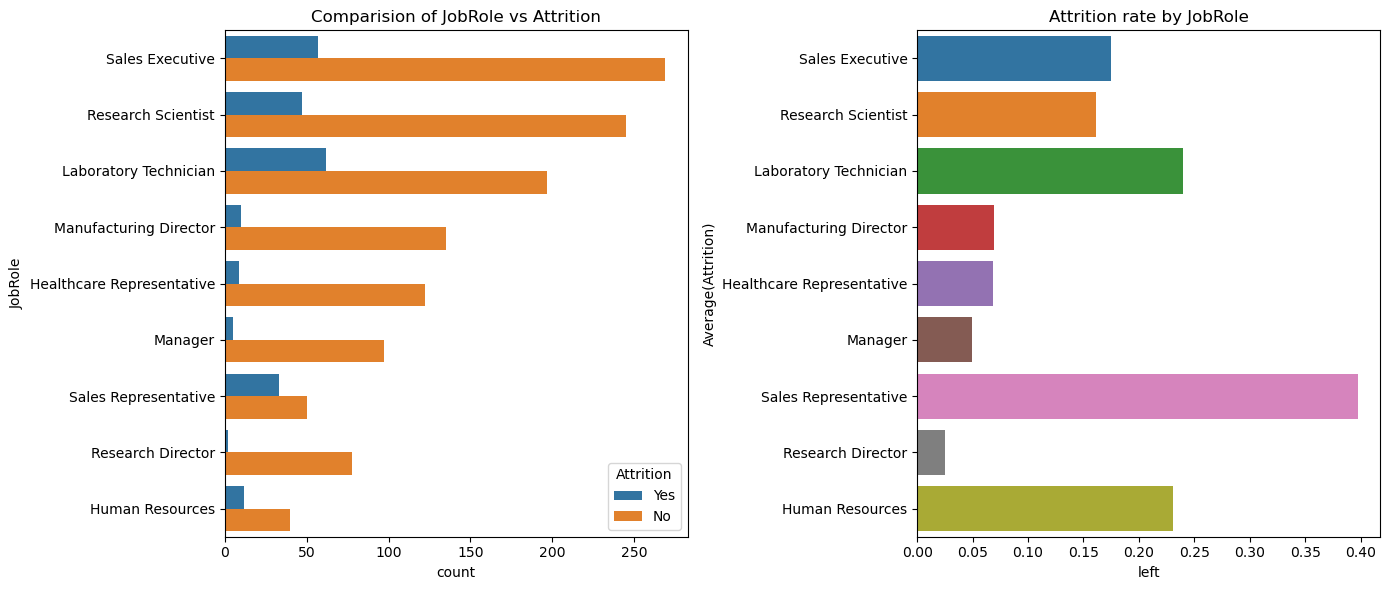

In [52]:
CategoricalVariables_targetPlots(df,"JobRole",invert_axis=True)

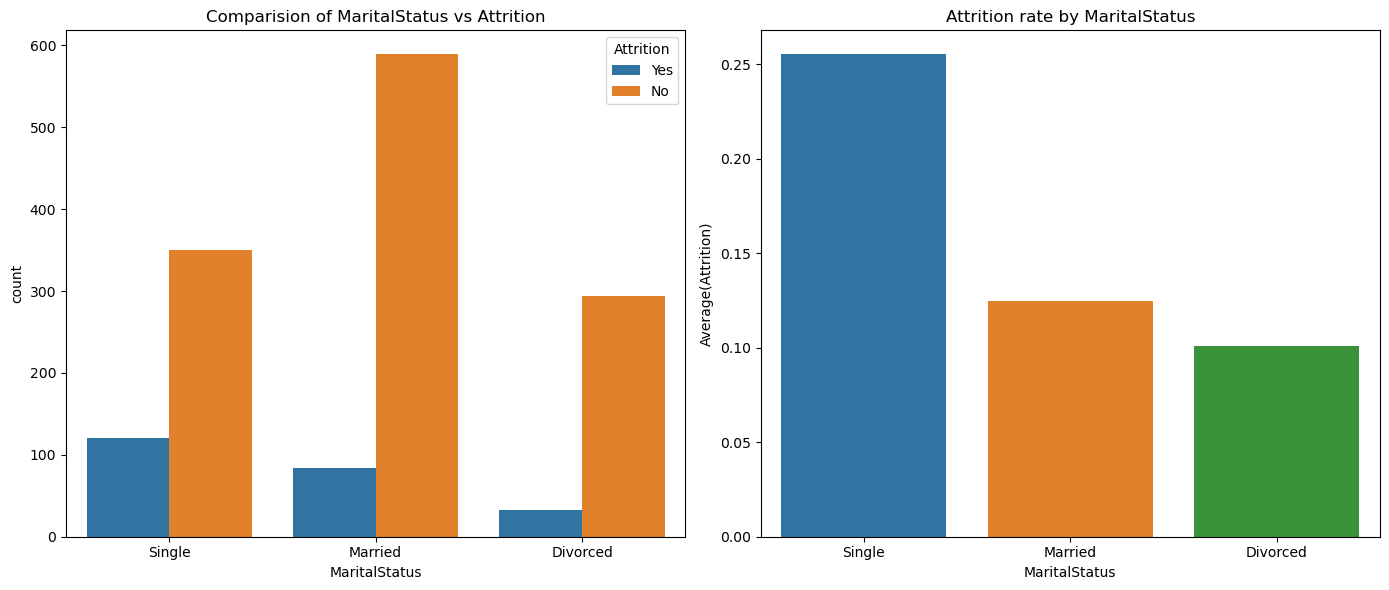

In [53]:
CategoricalVariables_targetPlots(df,"MaritalStatus")


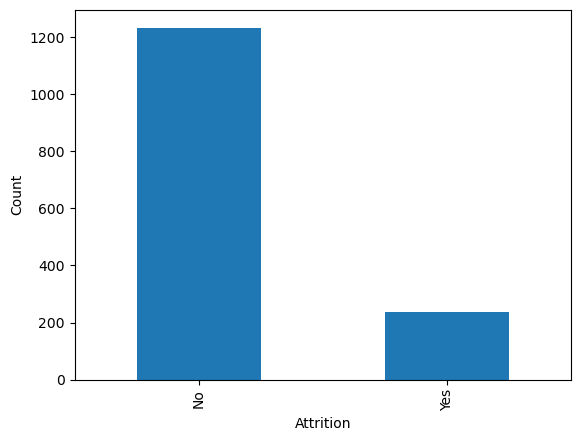

In [54]:
df.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [55]:
df["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [56]:
df_new = df.copy()

In [59]:
dict(df_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EmployeeCount': dtype('int64'),
 'EmployeeNumber': dtype('int64'),
 'EnvironmentSatisfaction': dtype('int64'),
 'Gender': dtype('O'),
 'HourlyRate': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'Over18': dtype('O'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StandardHours': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance'

In [63]:
numeric_variable_names  = [key for key in dict(df_new.dtypes) if dict(df_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(df_new.dtypes) if dict(df_new.dtypes)[key] in ["object"]]


In [64]:
categorical_variable_names


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [66]:
df_num = df_new[numeric_variable_names]

In [67]:
df_cat = df_new[categorical_variable_names]
#dropping the attrition 
df_cat.drop(["Attrition"],axis=1,inplace=True)

In [68]:
df_cat = pd.get_dummies(df_cat)

In [69]:
df_final = pd.concat([df_num, df_cat,df_new[["Attrition"]]],axis=1)

In [70]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,1,0,0,0,1,1,0,1,Yes
1,49,279,8,1,1,2,3,61,2,2,...,1,0,0,0,1,0,1,1,0,No
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,1,1,0,1,Yes
3,33,1392,3,4,1,5,4,56,3,1,...,1,0,0,0,1,0,1,0,1,No
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,1,0,1,1,0,No


In [71]:
features =  list(df_final.columns.difference(["Attrition"]))

In [72]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender_Female',
 'Gender_Male',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompanie

In [73]:
X = df_final[features]
y = df_final[["Attrition"]]

In [74]:
X.shape

(1470, 56)

In [75]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

In [76]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [77]:
y_train.Attrition.value_counts()/len(y_train)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

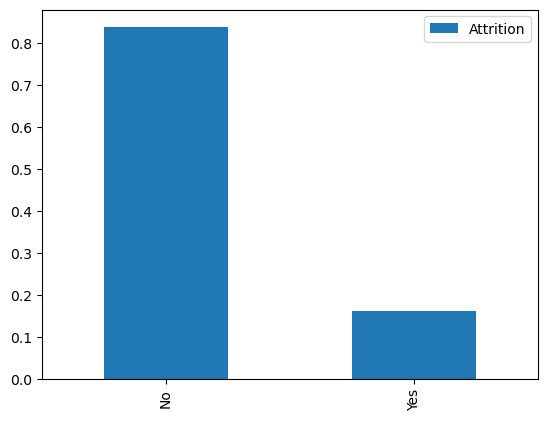

In [78]:
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [79]:
y_test.Attrition.value_counts()/len(y_test)

No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

In [82]:
pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [83]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [84]:
scores['test_score'].mean()

1.0